In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercício 3:** Determinar uma solução aproximada da equação diferencial parcial elíptica
$$
\begin{aligned}
& \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0, \quad 1<x<2, \quad 0<y<1 ; \\
& u(x, 0)=2 \ln x, \quad u(x, 1)=\ln \left(x^2+1\right), \quad 1 \leq x \leq 2 ; \\
& u(1, y)=\ln \left(y^2+1\right), \quad u(2, y)=\ln \left(y^2+4\right), \quad 0 \leq y \leq 1 . \\
&
\end{aligned}
$$
Use $h=k=\frac{1}{3}$ e compare os resultados com a solução real $u(x, y)=\ln \left(x^2+y^2\right)$.

In [2]:
nx = 20 # nº de subintervloes em x
ny = 10 # nº de subintervaloes em y

In [3]:
# Determinação da malha - coordenadas em x
x_coords = np.linspace(1,2,nx+1)
# Determinação da malha - coordenadas em y
y_coords = np.linspace(0,1,ny+1) 

#print('coordenadas em x:', x_coords)
#print('coordenadas em y:',y_coords)

In [4]:
hx = (x_coords[-1]-x_coords[0])/nx
#print('hx =', hx)
      
hy = (y_coords[-1]-y_coords[0])/ny
#print('hy =', hy)

In [5]:
x, y = np.meshgrid(x_coords, y_coords, indexing='xy')
#print(x)

In [6]:
#print(y)

In [7]:
u = np.zeros_like(x)

**Condições de contorno:** $\quad u(x, 0)=2 \ln x\quad \text{e} \quad u(x, 1)=\ln \left(x^2+1\right)$


In [8]:
u[0] = 2*np.log(x_coords)
#print(u[0])

In [9]:
u[-1] = np.log(x_coords**2+1)
#print(u[-1])

**Condições de contorno:** $u(1, y)=\ln \left(y^2+1\right), \quad u(2, y)=\ln \left(y^2+4\right)$

In [10]:
u[:,0] = np.log(y_coords**2+1)
#print(u[:,0])

In [11]:
u[:,-1] = np.log(y_coords**2+4)
#print(u[:,0-1])

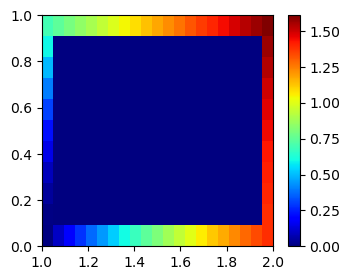

In [12]:
x_mesh, y_mesh = np.meshgrid(np.linspace(1,2,nx+2),np.linspace(0,1,ny+2))

fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh, u, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

In [13]:
# matriz dos pontos internos
N = (nx-1) * (ny-1)
A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)
print('A.shape:', A.shape)

A.shape: (171, 171)


In [14]:
def idx(i, j):
    return (i-1)*(ny-1) + (j-1)

In [15]:
# Montagem do sistema
ax = 1.0/hx**2
ay = 1.0/hy**2
ac = -2.0*(ax+ay)

for i in range(1, nx):        # i = 1 .. nx-1 (internos em x)
    for j in range(1, ny):    # j = 1 .. ny-1 (internos em y)
        k = idx(i, j)
        A[k, k] = ac

        if i > 1:
            A[k, idx(i-1, j)] = ax
        else:
            b[k] -= ax * u.T[0,j]

        if i < nx-1:
            A[k, idx(i+1, j)] = ax
        else:
            b[k] -= ax * u.T[-1,j]

        if j > 1:
            A[k, idx(i, j-1)] = ay
        else:
            b[k] -= ay * u.T[i,0]

        if j < ny-1:
            A[k, idx(i, j+1)] = ay
        else:
            b[k] -= ay * u.T[i,-1]

In [16]:
# Resolve o sistema
u_int = np.linalg.solve(A, b).reshape((nx-1, ny-1))

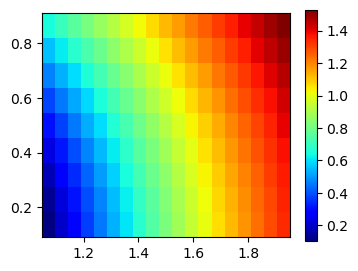

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh[1:-1,1:-1], y_mesh[1:-1,1:-1], 
               u_int.T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

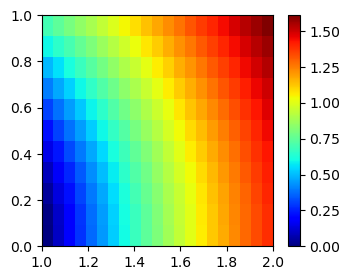

In [18]:
# plotando incluindo as fronteiras
u[1:-1, 1:-1] = u_int.T 
x_mesh, y_mesh = np.meshgrid(np.linspace(1,2,nx+2),np.linspace(0,1,ny+2))

fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh, u, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()


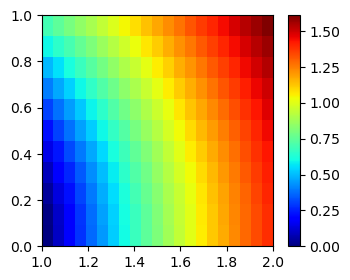

In [19]:
u_exat = np.log(x**2+y**2)
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh , u_exat, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()


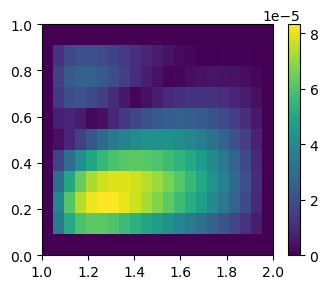

In [20]:
# Plot do erro em valor absoluto

fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(x_mesh, y_mesh , np.abs(u-u_exat), shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()


**Exercício 4: Diferenças Finitas na Equação de Poisson** Use o método de Poisson de diferenças finitas $\operatorname{com} n=6, m=5$, e tolerância de $10^{-10}$ para obter uma aproximação da solução de

$$
\frac{\partial^2 u}{\partial x^2}(x, y)+\frac{\partial^2 u}{\partial y^2}(x, y)=x e^y, \quad 0<x<2, \quad 0<y<1,
$$

com as condições de contorno

$$
\begin{aligned}
& u(0, y)=0, u(2, y)=2 e^y, 0 \leq y \leq 1, \\
& u(x, 0)=x, u(x, 1)=e x, 0 \leq x \leq 2
\end{aligned}
$$

e compare os resultados com a solução exata $u(x, y)=x e^y$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt